In [3]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

/home/zaccharie/workspace/fastmri-reproducible-benchmark/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/zaccharie/workspace/fastmri-reproducible-benchmark/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/zaccharie/workspace/fastmri-reproducible-benchmark/venv/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [10]:
plt.rcParams['figure.figsize'] = (9, 5)

In [4]:
sns.set()

In [5]:
df_learning_curves = pd.read_csv('updnet_learning_curves.csv')

<IPython.core.display.Javascript object>


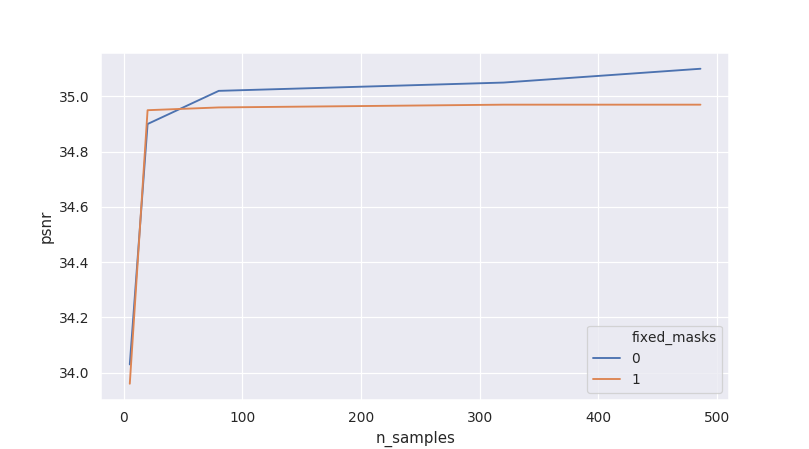

In [12]:
sns.lineplot(data=df_learning_curves, x='n_samples', y='psnr', hue='fixed_masks')
plt.savefig('updnet_learning_curves.png')